In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
base_dir = r"C:\Users\RAVI\OneDrive\Desktop\waste\DATASET"
train_dir = base_dir + r"\TRAIN"
test_dir = base_dir + r"\TEST"

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)

In [13]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.


In [24]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2513 images belonging to 2 classes.


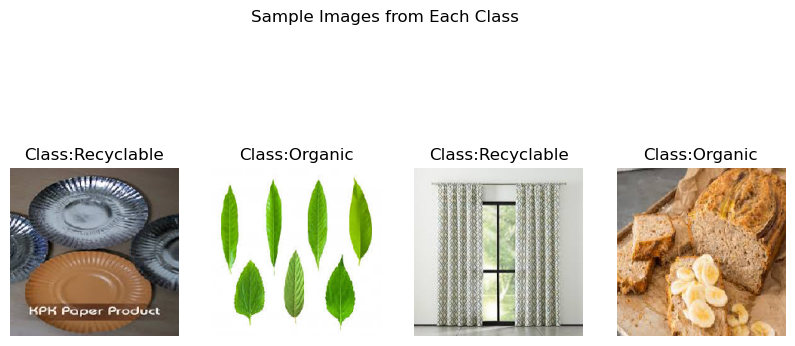

In [15]:
plt.figure(figsize=(10, 5))
for i in range(4):
    image, label = next(train_data)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])
    plt.title("Class:" + ("Organic" if label [0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [17]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [26]:
history = model.fit(
    train_data, 
    validation_data = test_data, 
    epochs = 2 
)
model.save('mobilenet_waste_classifier.h5')
loss, accuracy = model.evaluate(test_data) 
print("Model Accuracy:", accuracy)

C:\Users\RAVI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 765s 1s/step - accuracy: 0.8659 - loss: 0.3054 - val_accuracy: 0.9049 - val_loss: 0.2382
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 687s 973ms/step - accuracy: 0.9320 - loss: 0.1764 - val_accuracy: 0.8930 - val_loss: 0.2614


79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 564ms/step - accuracy: 0.8911 - loss: 0.2733
Model Accuracy: 0.8929566144943237


In [28]:
## Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix

#generate predictions
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)   #Convert probabilities to binary predictions
y_true = test_data.classes   #True labels from test data

#Print classification report
print("Classification ReportL\n",classification_report(y_true, y_pred, target_names=['Organic','Recyclable']))

#print confusion matrix
conf_matrix = confusion_matrix(y_true,y_pred)
print("Confusion Matrix:\n",conf_matrix)

79/79 ━━━━━━━━━━━━━━━━━━━━ 51s 609ms/step
Classification ReportL
               precision    recall  f1-score   support

     Organic       0.56      0.65      0.60      1401
  Recyclable       0.45      0.37      0.41      1112

    accuracy                           0.52      2513
   macro avg       0.51      0.51      0.51      2513
weighted avg       0.52      0.52      0.52      2513

Confusion Matrix:
 [[904 497]
 [698 414]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


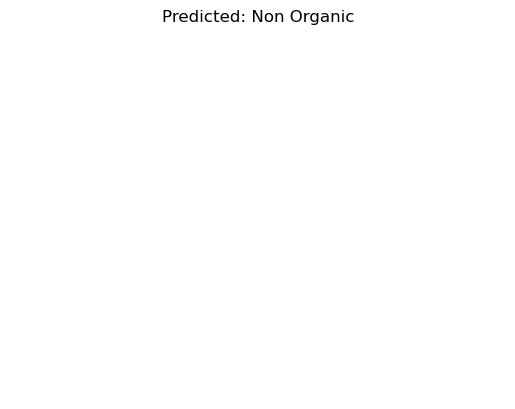

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#Path to the trained model and test image
model_path='mobilenet_waste_classifier.h5'
test_image_path=r"C:\Users\RAVI\OneDrive\Desktop\waste\DATASET\TEST\R\R_10000.jpg"

#Load the trained model
model = tf.keras.models.load_model(model_path)

#Load and prepare the test image
test_img = load_img(test_image_path, target_size=(224,224))   #Load the image and resize
test_img_array = img_to_array(test_img)/255.0   #Normalize pixel values
test_img_array = np.expand_dims(test_img_array,axis=0)   #add batch dimension

#Predict the class of the test image
predicted_prob= model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'

#Display the test image and prediction
plt.show(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


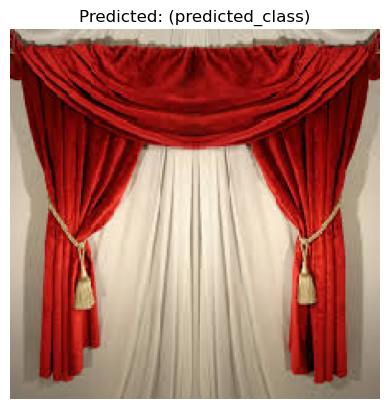

In [34]:
model = tf.keras.models.load_model(model_path)
test_img = load_img(test_image_path, target_size=(224, 224))
test_img_array = img_to_array(test_img) / 255.0 
test_img_array = np.expand_dims(test_img_array, axis=0)

predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 8.5 else 'Non Organic'

plt.imshow(test_img)
plt.title(f"Predicted: (predicted_class)")
plt.axis('off')
plt.show()